In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
donnees_traffics = pd.read_csv(os.path.join("data","tmja-2019.csv"), sep=";")

In [3]:
for colonne in donnees_traffics.columns:
    try:
        donnees_traffics[colonne] = donnees_traffics[colonne].apply(lambda element:element.replace(',',"."))
    except:
        print(donnees_traffics[colonne].dtype)
        if donnees_traffics[colonne].dtype == "object":
            print(colonne)
for colonne in donnees_traffics.columns:
    try:
        donnees_traffics[colonne] = donnees_traffics[colonne].astype(float)
    except:
        print(donnees_traffics[colonne].dtype)
        if donnees_traffics[colonne].dtype == "object":
            print(colonne)

int64
int64
int64
int64
int64
int64
float64
float64
object
typeComptageTrafic_lib
float64
object
ratio_PL
object
dateReferentiel
object
route
object
concessionPrD
object
concessionPrF
object
typeComptageTrafic_lib
object
ratio_PL


<AxesSubplot:ylabel='Frequency'>

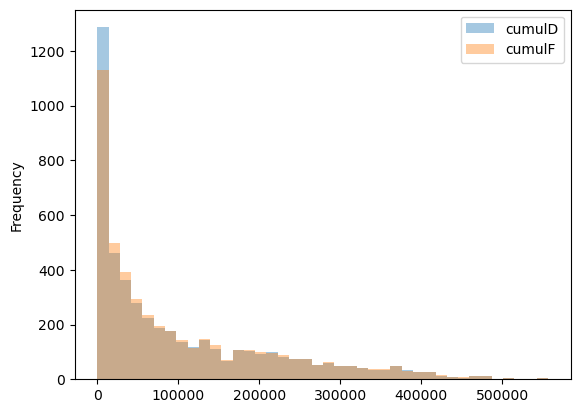

In [4]:
donnees_traffics[['cumulD', 'cumulF']].astype(float).plot(kind="hist", bins=40, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

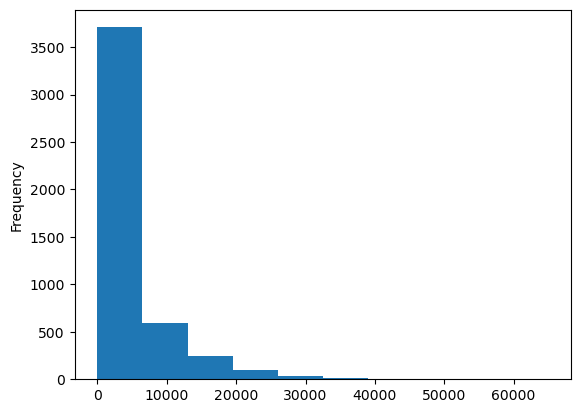

In [5]:
donnees_traffics['longueur'].astype(float).plot(kind='hist')

In [6]:
donnees_traffics["pas_camions"] = donnees_traffics['ratio_PL'].isnull()

In [7]:
donnees_traffics.groupby('pas_camions')["TMJA"].mean()

pas_camions
False    31441.955570
True     37206.370588
Name: TMJA, dtype: float64

<AxesSubplot:ylabel='Frequency'>

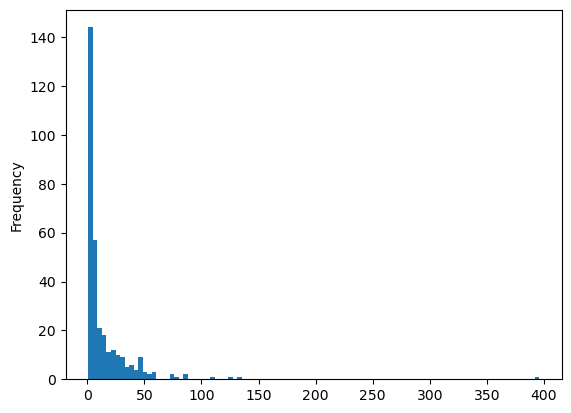

In [8]:
donnees_traffics['route'].value_counts().plot(kind='hist',bins=100)

In [9]:
donnees_traffics['route'].value_counts()

N0007    396
N0031    134
N0012    127
N0002    110
A0035     86
        ... 
N0014      1
N0009      1
BPNL       1
A0844      1
P0542      1
Name: route, Length: 323, dtype: int64

In [10]:
donnees_traffics[donnees_traffics["route"] =="N0007"][["xD","yD"]].value_counts()

xD         yD        
653385.95  6848376.87    1
842141.11  6483056.33    1
842100.37  6398059.60    1
842040.09  6342158.35    1
842024.10  6468993.25    1
                        ..
829109.33  6527189.49    1
829070.32  6527293.38    1
828367.97  6528149.17    1
828348.73  6528441.89    1
852350.90  6430242.22    1
Length: 396, dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

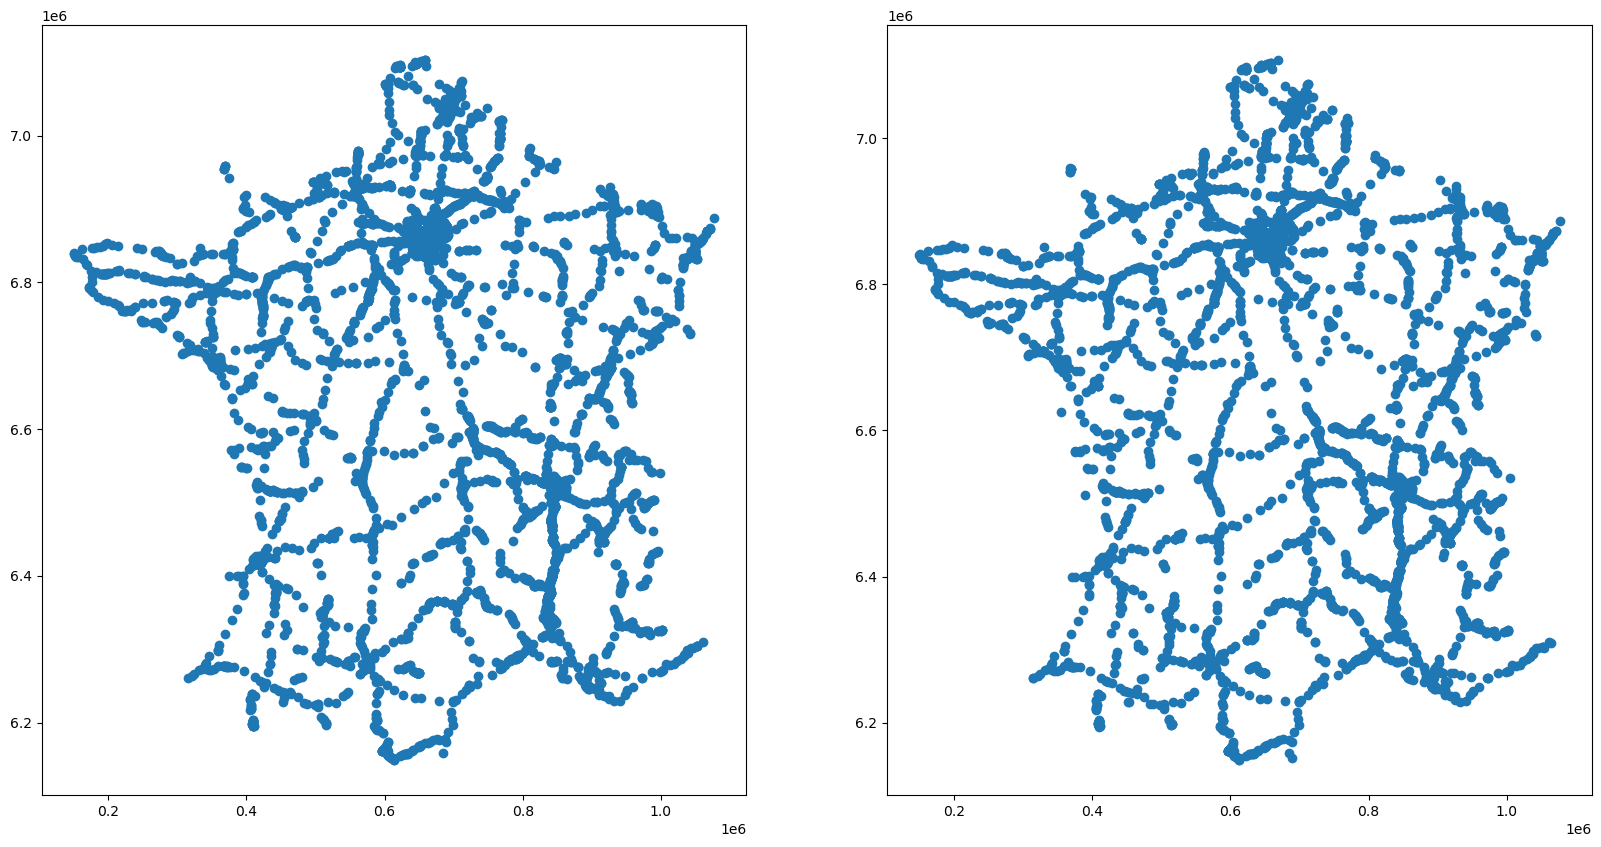

In [12]:
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].scatter(donnees_traffics['xD'].astype(float), donnees_traffics['yD'].astype(float))
axes[1].scatter(donnees_traffics['xF'].astype(float), donnees_traffics['yF'].astype(float))

In [13]:
donnees_traffics['longueur_route_l2'] = ((donnees_traffics['xF']-donnees_traffics['xD'])**2 + (donnees_traffics['yF']-donnees_traffics['yD'])**2)**(1/2)

<AxesSubplot:ylabel='Frequency'>

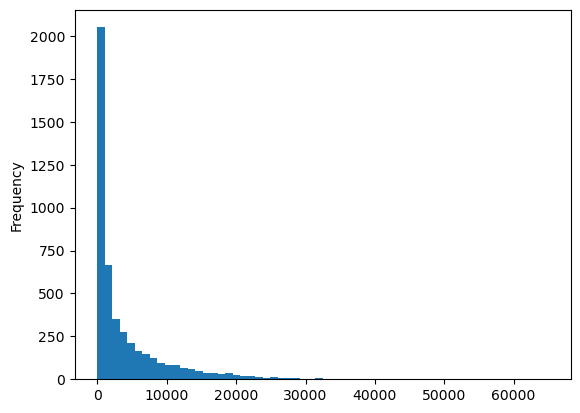

In [14]:
donnees_traffics['longueur'].plot(kind='hist',bins=60)

In [26]:
def create_tuple_values(x):
    return (x.xD, x.yD)

def create_tuple_values_ending(x):
    return (x.xF, x.yF)
coordinates_beginning = donnees_traffics.apply(create_tuple_values, axis=1)
coordinates_ending = donnees_traffics.apply(create_tuple_values_ending, axis=1)

In [32]:
test = (727992.54, 6598900.24)
donnees_traffics[
    (
        (donnees_traffics['xD']==test[0]) | (donnees_traffics['xF']==test[0]) 

    )
    &
    (
        (donnees_traffics['yD']==test[1]) | (donnees_traffics['yF']==test[1]) 
    )
][['route','xD','yD','xF','yF']]

,route,xD,yD,xF,yF
2088,N0007,727869.80,6599564.42,727992.54,6598900.24
2089,N0007,727992.54,6598900.24,727994.86,6598880.39


In [29]:
set(coordinates_beginning).intersection(set(coordinates_ending))

{(727992.54, 6598900.24),
 (402674.66, 6662086.79),
 (662130.64, 6862481.95),
 (718099.4, 6244969.88),
 (884842.65, 6259713.83),
 (424470.18, 6764273.56),
 (1031176.43, 6820460.85),
 (844473.67, 6535628.56),
 (350315.3, 6786459.62),
 (347044.03, 6791428.69),
 (842335.63, 6315506.52),
 (612988.42, 6148829.7),
 (715115.3, 6921413.42),
 (869726.79, 6283091.55),
 (641211.07, 6883861.69),
 (808412.05, 6302219.12),
 (946921.7, 6570401.04),
 (681581.5, 6922708.35),
 (685842.97, 6894021.19),
 (774365.81, 6596215.29),
 (424168.57, 6765981.84),
 (840928.77, 6342829.01),
 (978969.4, 6324109.04),
 (862055.84, 6520638.31),
 (811355.33, 6589040.01),
 (766410.41, 7003513.86),
 (934040.45, 6839035.84),
 (710622.45, 6555078.23),
 (804901.0, 6310274.12),
 (1048838.7, 6840449.75),
 (346250.24, 6694165.09),
 (579061.4, 6585094.99),
 (830678.02, 6317816.54),
 (873539.09, 6443273.14),
 (194118.3, 6811342.91),
 (647618.29, 6846023.22),
 (525656.95, 6691653.15),
 (831719.36, 6525875.34),
 (382214.95, 6571851.

In [15]:
from sklearn.cluster import KMeans

In [49]:
cluster = KMeans(n_clusters=120,init='k-means++')

In [50]:
donnees_k_means = donnees_traffics[['xD','yD']].dropna()

In [51]:
donnees_traffics['TMJA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4695 entries, 0 to 4694
Series name: TMJA
Non-Null Count  Dtype  
--------------  -----  
3741 non-null   float64
dtypes: float64(1)
memory usage: 36.8 KB


In [67]:
donnees_traffics

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,pas_camions,longueur_route_l2
0,01/01/2019,31D0044,44.0,0.0,31.0,N,0.0,0.0,511656.78,6204078.36,...,511698.51,6204063.93,0.0,NaN,NaN,NaN,NaN,NaN,True,44.154477
1,01/01/2019,31D0044E,762.0,0.0,31.0,N,0.0,0.0,511367.22,6204210.06,...,511880.76,6203732.40,0.0,NaN,NaN,NaN,NaN,NaN,True,701.343288
2,01/01/2019,69D0301,6055.0,2.0,69.0,N,-981.0,0.0,844036.84,6510806.45,...,849346.89,6509342.34,0.0,NaN,NaN,NaN,NaN,NaN,True,5508.198353
3,01/01/2019,69D0383,13752.0,4.0,69.0,N,-494.0,0.0,846831.30,6522372.16,...,843537.87,6512429.80,0.0,NaN,NaN,NaN,NaN,NaN,True,10473.643279
4,01/01/2019,69D0383BPNL,2408.0,0.0,69.0,N,0.0,0.0,844982.46,6522772.27,...,846831.30,6522372.16,0.0,NaN,NaN,NaN,NaN,NaN,True,1891.638802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8.0,76.0,N,0.0,0.0,560104.39,6927892.82,...,559383.28,6929517.35,0.0,0.0,NaN,NaN,NaN,NaN,True,1777.384976
4691,01/01/2019,P0224,8995.0,211.0,31.0,N,-638.0,0.0,555988.61,6288880.30,...,562812.02,6287175.90,0.0,NaN,NaN,NaN,NaN,NaN,True,7033.057897
4692,01/01/2019,P0524,1777.0,31.0,33.0,N,-768.0,0.0,440252.10,6361052.92,...,440343.36,6359374.43,0.0,NaN,NaN,NaN,NaN,NaN,True,1680.969086
4693,01/01/2019,P0524,3860.0,31.0,33.0,N,1009.0,1777.0,458798.85,6325912.32,...,458785.94,6322872.51,0.0,NaN,NaN,NaN,NaN,NaN,True,3039.837414


In [97]:
sc = StandardScaler()
# X_k_means = sc.fit_transform(donnees_k_means)
X_k_means = donnees_k_means/1e5

In [98]:
cluster.fit(X_k_means)

c:\Users\32mor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=120)

In [61]:
donnees_k_means['cluster']  = cluster.predict(X_k_means)

<AxesSubplot:xlabel='xD', ylabel='yD'>

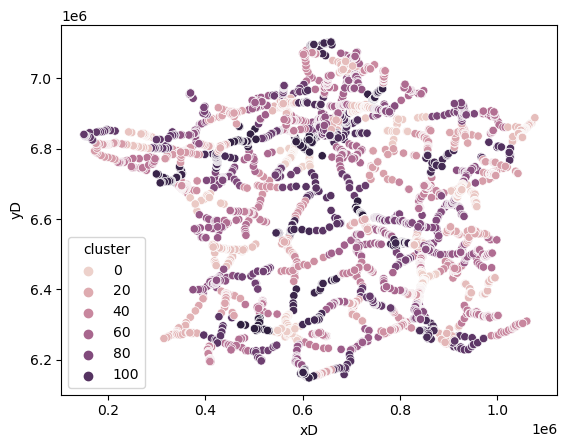

In [62]:
sns.scatterplot(x="xD", y="yD", data=donnees_k_means, hue="cluster",cmap="coolwarm")

<AxesSubplot:xlabel='xD', ylabel='yD'>

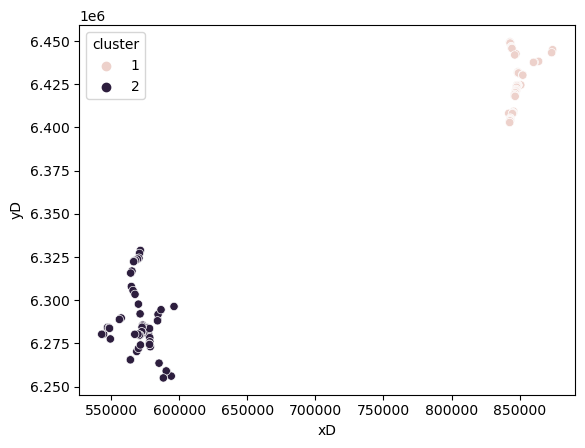

In [64]:
sns.scatterplot(x="xD", y="yD", data=donnees_k_means[donnees_k_means['cluster'].isin([1,2])], hue="cluster",cmap="coolwarm")

In [70]:
clusters_center = cluster.cluster_centers_
dict_map_lat = {}
dict_map_long = {}
dict_map_tupple = {}
for i, cluster_center in enumerate(clusters_center):
    dict_map_lat[i] = cluster_center[0]
    dict_map_long[i] = cluster_center[1]


In [73]:
X_k_means["cluster"] = cluster.predict(X_k_means)

In [76]:
X_k_means["cluster_x"] = X_k_means['cluster'].map(dict_map_lat)
X_k_means['cluster_y'] = X_k_means['cluster'].map(dict_map_long)

In [79]:
X_k_means['squarred_distances'] = (X_k_means['xD'] - X_k_means['cluster_x'])**2 + (X_k_means['yD'] - X_k_means['cluster_y'])**2 

In [82]:
X_k_means.groupby('cluster')['squarred_distances'].max()

cluster
0      0.164615
1      0.111029
2      0.172684
3      0.370394
4      0.174235
         ...   
115    0.061659
116    0.114267
117    0.254842
118    0.127112
119    0.083938
Name: squarred_distances, Length: 120, dtype: float64

In [85]:
from geopy import distance

In [91]:
cluster1_center = (clusters_center[0,0],clusters_center[0,1])
test = (X_k_means[X_k_means.cluster==0].iloc[0,0], X_k_means[X_k_means.cluster==0].iloc[0,1])

In [94]:
distance.distance(cluster1_center, test).km

34.33715055138213

In [29]:
def measure_function(cluster_1, cluster_2):
    return (cluster_1[:,0].mean()-cluster_2[:,0].mean())**2  +(cluster_1[:,1].mean()-cluster_2[:,1].mean())**2  

In [32]:
X = np.random.rand(20,2)

In [34]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist

In [40]:
from scipy.cluster import hierarchy

In [45]:
hierarchy.linkage(X, method="average")

array([[13.        , 17.        ,  0.03914328,  2.        ],
       [ 1.        ,  8.        ,  0.05262384,  2.        ],
       [ 0.        , 14.        ,  0.08227486,  2.        ],
       [16.        , 21.        ,  0.11199461,  3.        ],
       [ 3.        , 15.        ,  0.12315087,  2.        ],
       [ 4.        ,  6.        ,  0.1384707 ,  2.        ],
       [ 5.        , 22.        ,  0.14454481,  3.        ],
       [ 9.        , 12.        ,  0.17238258,  2.        ],
       [ 2.        , 23.        ,  0.19173092,  4.        ],
       [10.        , 26.        ,  0.19959419,  4.        ],
       [ 7.        , 25.        ,  0.21705984,  3.        ],
       [20.        , 27.        ,  0.25631271,  4.        ],
       [18.        , 19.        ,  0.26196648,  2.        ],
       [11.        , 30.        ,  0.28979012,  4.        ],
       [24.        , 28.        ,  0.34726794,  6.        ],
       [29.        , 31.        ,  0.45299423,  8.        ],
       [33.        , 34.

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [ ]:
dendrogram

In [48]:
Y = np.random.rand(10,2)
distance_matrix(X, Y).shape

(20, 10)

In [30]:
import math

class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = measure_function
        self.clusters = self.init_clusters()
        self.clusters_weights = self.init_weight_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def init_weight_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data[''])}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))

In [50]:
cluster_1 = np.random.randn(10,2)
cluster_2 = np.random.randn(8,2)

In [51]:
from scipy.cluster import _hierarchy

In [52]:
from sklearn.cluster import AgglomerativeClustering